# Baseball Project

After finishing my first data analysis course on [Udacity](https://classroom.udacity.com/courses/ud170) it’s time for a real-world project. In this project, I’m going to explore baseball data. To be more specific: batting data for every player that played between 1871 and 2016. You can download the entire dataset [here](http://www.seanlahman.com/baseball-archive/statistics/). My process:
1. Having a first look at the data
2. Come up with a question
3. Wrangle the data
4. Explore the data
5. Draw conclusions / predictions
6. Communicating my findings

My goal is to find the secrets of baseball in the data and share it with you, so you can improve your game.

## First look at the data

The first step is to import a dataset. For the first look, I am going to display the first five entries to get an idea of what I’m dealing with.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Reading the batting data
filename = 'Batting.csv'
batting_df = pd.read_csv(filename)

# Printing the first five entries
batting_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Getting some metrics on the homeruns, number of games, runs batted in and the number of strikeouts
batting_df[['HR','G', 'RBI', 'SO']].describe()

,HR,G,RBI,SO
count,102816.000000,102816.000000,102392.000000,94978.000000
mean,2.813599,51.343439,17.003975,20.529712
std,6.304919,47.121658,26.352011,28.328542
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,13.000000,0.000000,1.000000
50%,0.000000,34.000000,3.000000,9.000000
75%,2.000000,80.000000,24.000000,29.000000
max,73.000000,165.000000,191.000000,223.000000


Looking at the table above it seems batters hit an average of 2.8 home runs in a season with an average of 51 games.

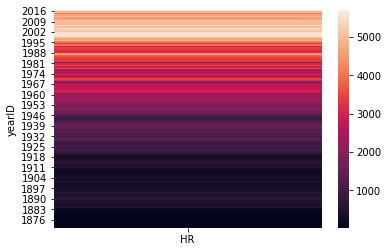

In [4]:
batting_df_groupedby_year = batting_df.groupby(['yearID']).sum()
homeruns_per_year = batting_df_groupedby_year[['HR']]

# Plotting the heatmap in reverse order to make it easier to see the increase
sns.heatmap(homeruns_per_year.iloc[::-1])

Above you can see the number of home runs increase as the years pass. On the left y-axis you can see the year and on the right y-axis, you can see the number of home runs.

## Questions

Before the data will reveal its secrets I have to ask it a few question. Here are some examples of questions I can ask the data:
1. Which teams have to most effective batters
2. Is there a correlation between Strikeouts and Home Runs?
3. Who is the best stealer of history (Caught Stealing vs. Stolen Bases)
4. Which region produces the best batters (need to merge with another table for that)
5. What is the relationship between different performance metrics? Do any have a strong negative or positive relationship?
6. What are the characteristics of baseball players with the highest salaries?

The question I am going to focus on is:
### Which metrics correlate and which metrics do not?

## Wrangling

In [5]:
# Displaying the batting data for the last ten years
batting_last_ten_years = batting_df.groupby(['yearID'], as_index=False).sum().sort_values(by='yearID', ascending=False).head(10)
batting_last_ten_years

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
145,2016,1620,70451,165561,21744,42276,8254,873,5610,20745.0,2537.0,1001.0,15088,38982.0,932.0,1651.0,1025.0,1214.0,3719.0
144,2015,1630,70534,165488,20647,42106,8242,939,4909,19650.0,2505.0,1064.0,14073,37446.0,951.0,1602.0,1200.0,1232.0,3739.0
143,2014,1558,69564,165614,19761,41595,8137,849,4186,18745.0,2764.0,1035.0,14020,37441.0,985.0,1652.0,1343.0,1277.0,3609.0
142,2013,1522,69268,166070,20255,42093,8222,772,4661,19271.0,2693.0,1007.0,14640,36710.0,1018.0,1536.0,1383.0,1219.0,3732.0
141,2012,1539,69519,165251,21017,42063,8261,927,4934,19998.0,3229.0,1136.0,14709,36426.0,1055.0,1494.0,1479.0,1223.0,3614.0
140,2011,1485,68729,165705,20808,42267,8399,898,4552,19804.0,3279.0,1261.0,15018,34488.0,1231.0,1554.0,1667.0,1274.0,3523.0
139,2010,1464,68921,165353,21308,42554,8486,866,4613,20288.0,2959.0,1128.0,15778,34306.0,1216.0,1549.0,1544.0,1301.0,3719.0
138,2009,1514,69038,165849,22419,43524,8737,949,5042,21364.0,2970.0,1133.0,16620,33591.0,1179.0,1590.0,1635.0,1366.0,3796.0
137,2008,1481,69565,166714,22585,43972,9014,886,4878,21541.0,2799.0,1035.0,16337,32884.0,1310.0,1672.0,1526.0,1365.0,3883.0
136,2007,1501,70143,167783,23322,44977,9197,938,4957,22257.0,2918.0,1002.0,16079,32189.0,1323.0,1755.0,1540.0,1441.0,3983.0


The dataset I am using is already very clean. I don’t have to do a lot of wrangling to get to the data I need. Above you can see batting data of the last 10 years.

## Exploring

In the next code block, I will calculate the correlations between Home runs and all the other metrics. This way we can see which metrics contribute to home runs and which metrics are bad for scoring home runs. For example, I expect batters who play more game to score more home runs. I also expect batters with a high RBI to score the most home runs.

A correlation of 1 between two values is a perfect positive correlation. This means that when one of the two values increases the other increases as well. A correlation of -1 is a negative correlation. This means that when one value increases the other decreases. As the value of a correlation goes to 0, the correlation is very small or non-existing. I will call a positive correlation ++, + or +- depending of the strenght of the correlation. No correlation will be O and negavtive correlations will range from -+, - to -- being a strong negative correlation.

In [6]:
def standardize(data):
    return (data - data.mean()) / data.std(ddof=0)

def pearsons_r(x, y):
    return (standardize(x) * standardize(y)).mean()

# It doesn't make sense to calculate the correlation between these values and homeruns
leave_out = ['playerID', 'yearID', 'teamID', 'lgID', 'HR']

# Meaning of the column names in the data
dictionary = {'playerID':'Player', 'yearID':'Year', 'teamID':'Team', 'lgID':'League', 'HR':'Homeruns','stint':'Stints', 'G':'Games', 'AB': 'At Bats', 'R': 'Runs', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'RBI':'Runs Batted In', 'SB':'Stolen Bases', 'CS':'Caught Stealing', 'BB':'Base on Balls', 'SO':'Strikeouts', 'IBB':'Intentional Walks', 'HBP':'Hit by pitch', 'SH':'Sacrifice hits', 'SF':'Sacrifice flies', 'GIDP':'Grounded into double plays'}

strong_positive_correlation = []
strong_negative_correlation = []

def correlations_for_hr(df):
    columns = list(df)
    for x in columns:
        if x not in leave_out:
            name_of_metric = dictionary[x]
            r = pearsons_r(df['HR'], df[x])
            
            # Calculating the strenth of the correlation
            correlation = ''
            if r > 0.7:
                correlation = '++'
                strong_positive_correlation.append(name_of_metric)
            elif r > 0.5:
                correlation = '+ '
            elif r > 0.3:
                correlation = '+-'
            elif r >= -0.3:
                correlation = 'O '
            elif r > -0.5:
                correlation = '-+'
            elif r > -0.7:
                correlation = '- '
            elif r > -1:
                correlation = '--'
                strong_negative_correlation.append(name_of_metric)
                
            print('{} Correlation between Homeruns and {}: {}'.format(correlation, name_of_metric, "%.3f"%r))
            print('---------------------------------------------------------------------')
            
print('Correlations:')
print('---------------------------------------------------------------------')
print(correlations_for_hr(batting_df))
print('\n')
print('Positive correlations: {}'.format(strong_positive_correlation))
print('\n')
print('Negative correlations: {}'.format(strong_negative_correlation))

Correlations:
---------------------------------------------------------------------
O  Correlation between Homeruns and Stints: -0.065
---------------------------------------------------------------------
+  Correlation between Homeruns and Games: 0.668
---------------------------------------------------------------------
+  Correlation between Homeruns and At Bats: 0.695
---------------------------------------------------------------------
++ Correlation between Homeruns and Runs: 0.729
---------------------------------------------------------------------
++ Correlation between Homeruns and Hits: 0.703
---------------------------------------------------------------------
++ Correlation between Homeruns and Doubles: 0.725
---------------------------------------------------------------------
+- Correlation between Homeruns and Triples: 0.348
---------------------------------------------------------------------
++ Correlation between Homeruns and Runs Batted In: 0.837
-------------------

### Reviewing first expectations
Remember my expectations? I expected the number of games and the RBI score to have a positive correlation with home runs. According to my calculations above, the number of games has a positive correlation with a Pearson’s R of .668. So players who played more games in a season have a higher number of home runs. This sounds very logical since batters who play more games have more chances of scoring a home run.

My other expectation was that a high RBI would mean a high number of home runs. The correlation between home runs and RBI is big with .837! This again is quite logical because home runs are able to reward the player with the most RBI points.

Another interesting fact is that there are no negative correlations. So, there is no metric that decreases when the number of home runs increases.

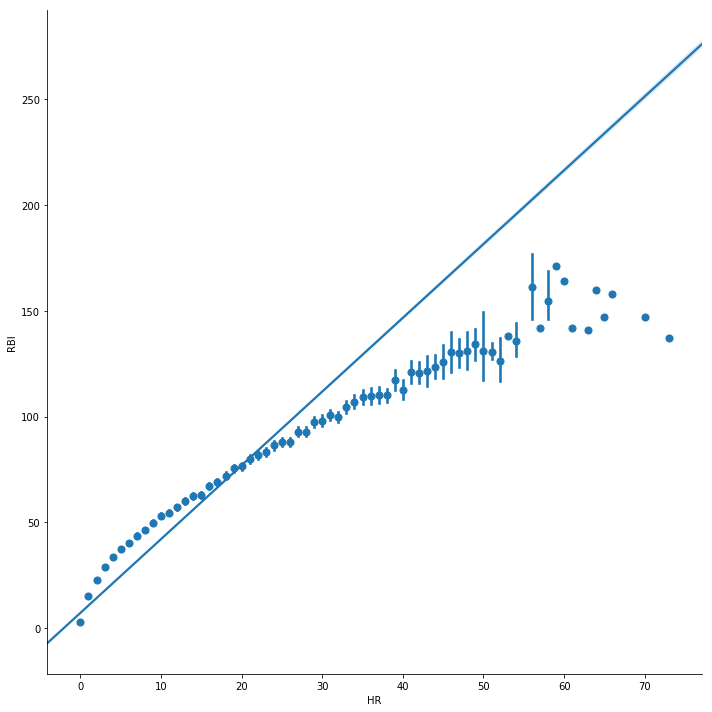

In [7]:
# HOME RUNS vs. RUNS BATTED IN
sns.lmplot(size=10, data=batting_df[['HR', 'RBI']], x='HR', y='RBI', x_estimator=np.mean)

The chart above shows how home runs correlate to RBI. You can see the number of home runs of the x-axis and the number of RBI points on the y-axis.

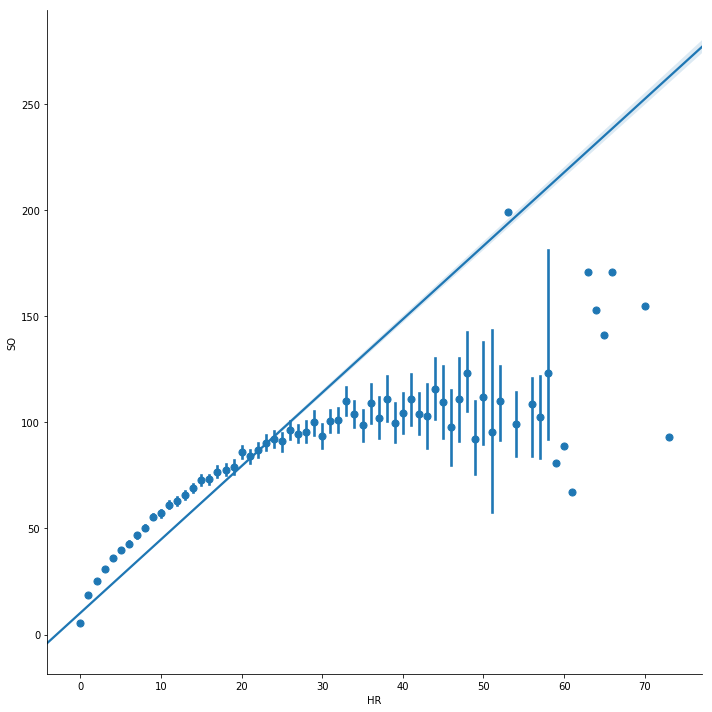

In [8]:
# HOME RUNS vs. STRIKEOUTS
sns.lmplot(size=10, data=batting_df[['HR', 'SO']], x='HR', y='SO', x_estimator=np.mean)

The plot above return and interesting correlation. It’s the correlation between home runs and strikeouts. The Pearson’s R correlation is .822, being almost as high as the correlation between home runs and RBI. This correlation was more interesting to me, because RBI’s are a direct result of home runs. Strikeouts, on the other hand, have a direct correlation between losing your chance at a home run. How on earth would strikeouts result in more home runs?

### How are homeruns and strikeouts related
To solve this mystery, I started thinking… Maybe the batters who take more risk, are more likely to score a home run. Because they swing even on balls that seem hard to hit. So, if taking more risks gives you more home runs, I took a look at risky metrics. Risky metrics are metrics that involve risk-taking like stealing bases. Let’s have a look at the correlation.

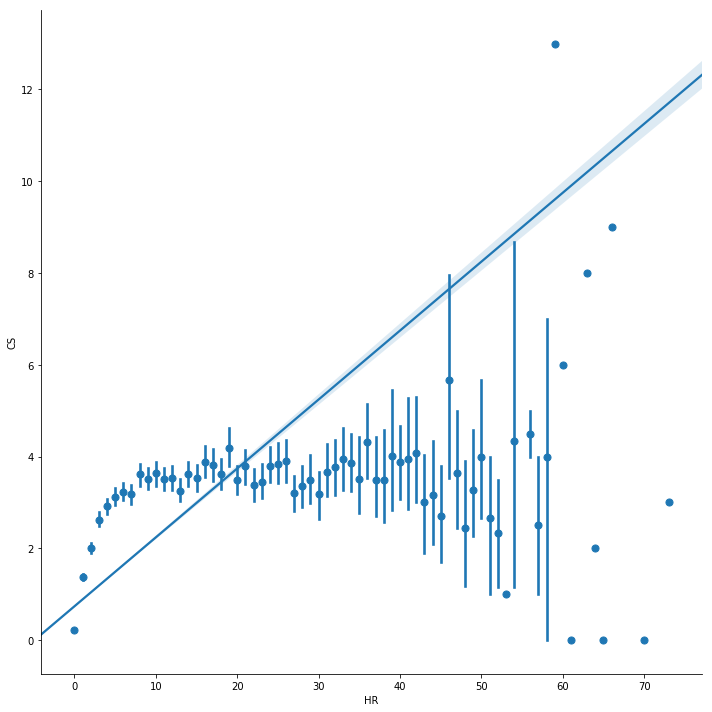

In [9]:
# HOMER UNS vs. CAUGHT STEALING
sns.lmplot(size=10, data=batting_df[['HR', 'CS']], x='HR', y='CS', x_estimator=np.mean)

Above you can see the correlation (.409) between home runs (x-axis) and the number of times a runner gets caught stealing (y-axis). There is a vague correlation, but it’s not enough to make a conclusion. Maybe the risk takers have gotten very good at stealing bases and don’t get caught stealing? Let’s look at stolen bases.

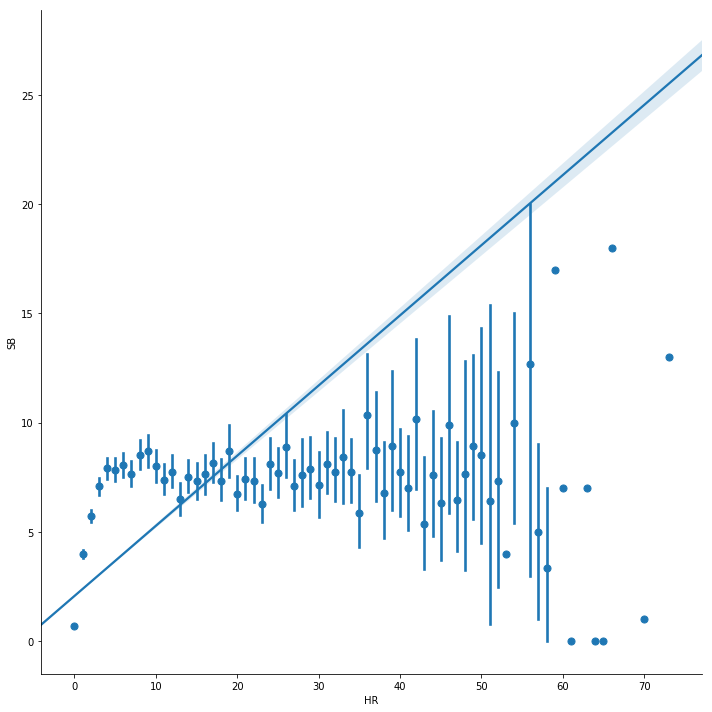

In [10]:
# HOME RUNS vs. STOLEN BASES
sns.lmplot(size=10, data=batting_df[['HR', 'SB']], x='HR', y='SB', x_estimator=np.mean)

Above you can see the correlation of .265 between home runs (x-axis) and stolen bases (y-axis). This correlation is non-existing. So, taking risks has nothing to do with scoring a home run.

The data alone is not going to reveal the secret of scoring a home run. I need to learn more about baseball to solve this mystery. My next plan of attack was watching YouTube videos to see how high scoring batters behave. As it turns out, scoring a home run has more to do with fine calculations than taking risks. I saw batters waiting for the right pitch. They rather get a strike, hoping the next throw will serve them batter, eh better. An added benefit is that the pitcher tires faster as he has to throw more balls.

## Conclusions / Predictions

To batters trying to improve their home run stats, I have a few suggestions. Step one in getting more home runs is: play more games, no excuses, play! Step two: get some strikeouts. It sounds counter-intuitive but it increases your number of home runs. The way this works: it blows out the pitcher and gives more time to wait for the best pitch to hit that GRAND SLAM.

For more about the [correlation between home runs and strikeouts](https://www.mlb.com/news/anthony-castrovince-increasing-strikeout-totals-acceptable-if-a-batter-produces-offensively/c-47432098) read this article.

Or this one about [risks of a tired pitcher](http://www.stack.com/a/pitcher-fatigue).

Read more about me and subscribe to be the first to receive updates at [ditisAnton.com](http://ditisanton.com).